# Rew's notebook

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from matplotlib.ticker import StrMethodFormatter

In [ ]:
!pwd

In [ ]:
!ls ..

In [ ]:
con = sqlite3.connect("../im.db")
con

In [2]:
schema = pd.read_sql("SELECT * FROM sqlite_master", con)

NameError: name 'con' is not defined

In [ ]:
schema

In [3]:
TMDBmovies = pd.read_csv("../zippedData/tmdb.movies.csv.gz")

In [4]:
Movie_budget = pd.read_csv("../zippedData/tn.movie_budgets.csv.gz")

In [5]:
Movie_gross = pd.read_csv("../zippedData/bom.movie_gross.csv.gz")

In [6]:
Movie_info = pd.read_csv('../zippedData/rt.movie_info.tsv.gz', sep='\t')

In [7]:
reviews = pd.read_csv('../zippedData/rt.reviews.tsv.gz', sep='\t', encoding='iso8859_2' )

In [8]:
TMDBmovies

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [9]:
Movie_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [ ]:
Movie_budget['worldwide_gross'] = Movie_budget['worldwide_gross'].astype(str)

In [20]:
Movie_gross

,title,studio,domestic_gross,foreign_gross,year,total_rev
0,Toy Story 3,BV,415000000.0,652000000,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000,2010,7.526000e+08
...,...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000,2018,1.501400e+06
3286,The Catcher Was a Spy,IFC,725000.0,229000,2018,9.540000e+05
3309,Time Freak,Grindstone,10000.0,256000,2018,2.660000e+05
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200,2018,9.840000e+04


## In the cells below this:
- Made a new colunm that has the total revenue for each movie
- Made a graph that shows the trend between the studios and how much money they make

In [10]:
Movie_gross['foreign_gross'] = Movie_gross['foreign_gross'].str.replace(',',"")

In [19]:
Movie_gross = Movie_gross.dropna(subset=['foreign_gross'])

In [ ]:
MV = Movie_gross['foreign_gross'].astype(float)

In [ ]:
MV

In [ ]:
Movie_gross['total_rev'] = MV + Movie_gross['domestic_gross']

In [21]:
Movie_gross.head(10)

,title,studio,domestic_gross,foreign_gross,year,total_rev
0,Toy Story 3,BV,415000000.0,652000000,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000,2010,7.526000e+08
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,6.985000e+08
6,Iron Man 2,Par.,312400000.0,311500000,2010,6.239000e+08
7,Tangled,BV,200800000.0,391000000,2010,5.918000e+08
8,Despicable Me,Uni.,251500000.0,291600000,2010,5.431000e+08
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010,4.949000e+08


In [39]:
studios = Movie_gross.groupby('studio')['total_rev'].mean().sort_values(ascending=True)[30:45]

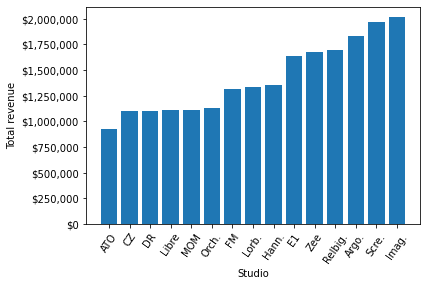

In [40]:
fig, ax = plt.subplots()
ax.bar(studios.index, studios)

plt.xticks(rotation=55)

ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
ax.set_xlabel('Studio')
ax.set_ylabel('Total revenue');



In [42]:
Movie_info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [ ]:
movies = Movie_gross.loc[(Movie_gross['year'] > 2009)]

In [ ]:
movies

In [ ]:
movies.

In [ ]:
movies

In [ ]:
movies.reset_index(inplace=True)

In [ ]:
movies.drop('index', inplace=True, axis=1)

In [ ]:
money_making_movies['title'].replace('-', ' ', regex=True, inplace=True)

In [ ]:
big_movies['year'].unique()

0       652000000.0
1       691300000.0
2       664300000.0
3       535700000.0
4       513900000.0
           ...     
3382            NaN
3383            NaN
3384            NaN
3385            NaN
3386            NaN
Name: foreign_gross, Length: 3387, dtype: float64

In [ ]:
money_making_movies = movies.head(2000)

In [ ]:
money_making_movies['total_rev'].sort_value().unique()

In [ ]:
money_making_movies['total_rev'] = money_making_movies['total_rev'].astype('int64') 

In [ ]:
money_making_movies["total_rev"].mean()

In [ ]:
money_making_movies['total_rev'] = money_making_movies['total_rev'].dropna()

In [ ]:
pd.options.display.float_format = '{:.5f}'.format

In [ ]:
money_making_movies.info()

In [ ]:
money_making_movies['total_rev'].mean()

In [ ]:
money_making_movies['total_rev'].fillna(0, inplace=True)

In [ ]:
fig, ax = plt.subplots()

# These are all arguments that go in the plot's function
ax.scatter(money_making_movies.head(7)['title'], money_making_movies.head(7)['total_rev'],
           c='blue')

ax.set_xlabel('Movie')
ax.set_ylabel('Total Revenue')
ax.set_title('Highest Grossing Movies')
plt.xticks(rotation=90)

plt.tight_layout()

In [ ]:
money_making_movies.head(10).plot(x='title', y='total_rev', kind='scatter', color='blue').plt.xticks(rotation=90);

In [ ]:
movies.loc[(movies['total_rev'] > '100000000')]


In [ ]:
Movie_info

Comparing the TMDB dataframe to the movies dataframe.

In [ ]:
big_movies = TMDBmovies.merge(money_making_movies)

In [ ]:
big_movies

In [ ]:
maybe = big_movies.sort_values(by='total_rev', ascending=False)

In [ ]:
maybe.head(50)

In [ ]:
maybe2 = big_movies.sort_values(by='year', ascending=True)

In [ ]:
maybe2

Which genre is most common? Drama
What studios could Microsoft buy? 





What can we ask about this data......
Which ones go together? (total_rev, genre, )
Metrics?
Differences in genres?
Just 1 genere or more than 1?
What can you do to make these movies?
Are we worried about domestic or forgien or both?

Before what year should we exclude movies?
How long of a movies should we concider?
Do the second installments of movies make more money? (ex Star Wars)



-Join SQL movie tables
-Get names of all columns
-Only movies that make more that 100 million dollars
-What movies get the most amount of views
-Only movies made after 2009
-See which movies have sequels
-